# <center>Regresión Lineal

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos 
df= pd.read_csv('Fish.csv')

# Filtrar los datos sin valores faltantes
df_fish = df.dropna()

# Mostrar las primeras filas del conjunto de datos
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr², donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.

In [7]:

# Calcular el volumen utilizando la fórmula: π * Height * (Width / 2)^2
df_fish['Volumen'] = np.pi * df_fish['Height'] * (df_fish['Width'] / 2) ** 2

# Mostrar las primeras filas del DataFrame con la nueva columna 'Volume'
print(df_fish.head())



  Species  Weight  Length1  Length2  Length3   Height   Width     Volumen
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200  146.215854
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056  181.707071
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961  214.391723
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555  198.477454
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340  257.609344


In [3]:
df_fish.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
 7   Radius   159 non-null    float64
 8   Volumen  159 non-null    float64
dtypes: float64(8), object(1)
memory usage: 11.3+ KB


### 2. Verifica la correlación posible entre las variables, numérica y gráficamente. ¿Aumenta la correlación al añadir el volumen? Explica.

Matriz de correlación original (sin volumen):
           Weight   Length1   Length2   Length3    Height     Width    Volume
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507  0.881981
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050  0.732409
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547  0.741313
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520  0.767774
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881  0.868256
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000  0.905626
Volume   0.881981  0.732409  0.741313  0.767774  0.868256  0.905626  1.000000

Matriz de correlación nueva (incluyendo volumen):
           Weight   Length1   Length2   Length3    Height     Width    Volume  \
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507  0.881981   
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050  0.732409   
Length2  0.918618  0.999517  1.00000

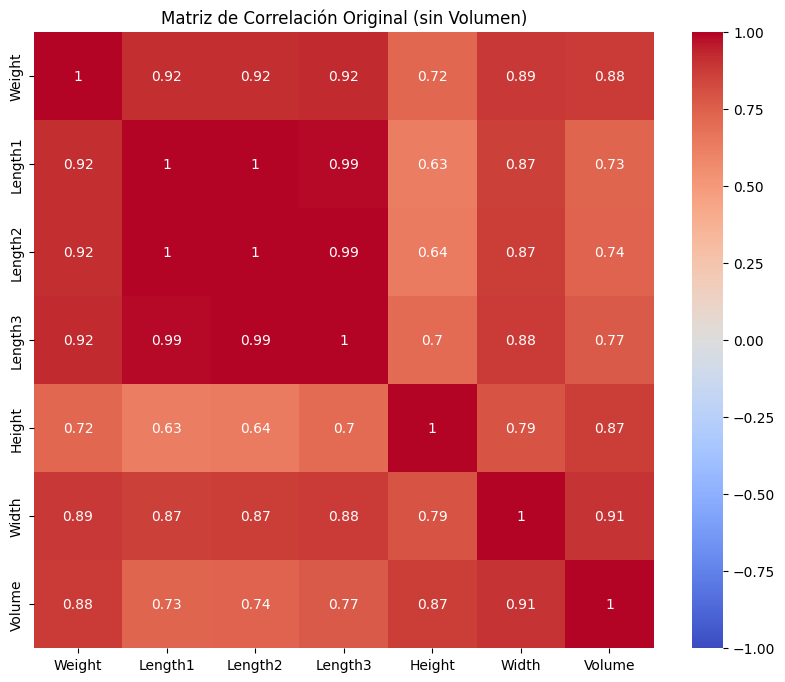

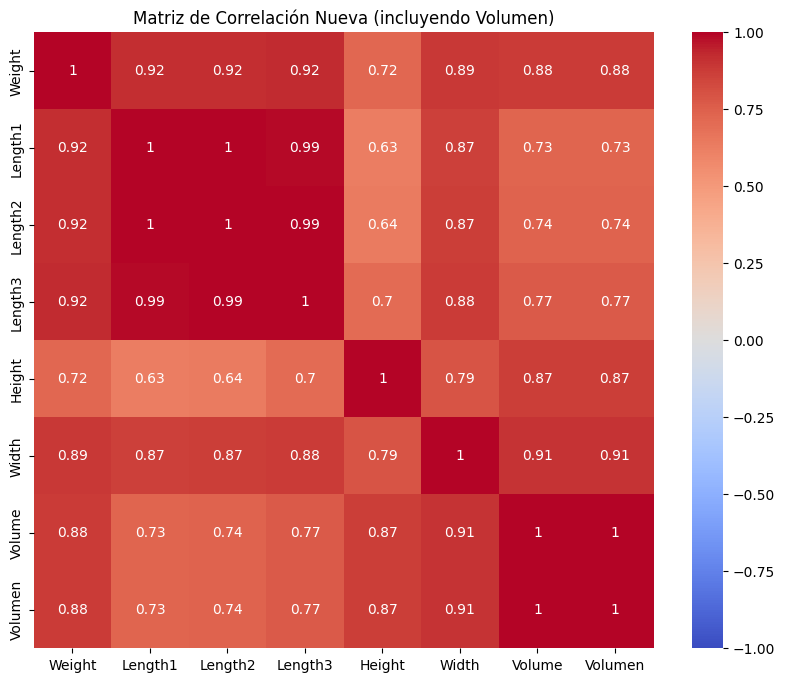

Correlación del Peso con otras variables (sin Volumen):
Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Volume     0.881981
Name: Weight, dtype: float64

Correlación del Peso con otras variables (incluyendo Volumen):
Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Volume     0.881981
Volumen    0.881981
Name: Weight, dtype: float64


In [14]:


# Calcular la matriz de correlación original (sin volumen)
correlation_matrix_original = df_fish.drop(columns=['Species']).corr()

# Calcular el volumen utilizando la fórmula: π * Height * (Width / 2)^2
df_fish['Volumen'] = np.pi * df_fish['Height'] * (df_fish['Width'] / 2) ** 2

# Calcular la nueva matriz de correlación incluyendo el volumen
correlation_matrix_new = df_fish.drop(columns=['Species']).corr()

# Comparar las matrices de correlación
print("Matriz de correlación original (sin volumen):")
print(correlation_matrix_original)

print("\nMatriz de correlación nueva (incluyendo volumen):")
print(correlation_matrix_new)

# Graficar la matriz de correlación original
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_original, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación Original (sin Volumen)')
plt.show()

# Graficar la nueva matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación Nueva (incluyendo Volumen)')
plt.show()

# Comparar la correlación entre Weight y otras variables antes y después de añadir Volumen
original_corr_with_weight = correlation_matrix_original['Weight']
new_corr_with_weight = correlation_matrix_new['Weight']

print("Correlación del Peso con otras variables (sin Volumen):")
print(original_corr_with_weight)

print("\nCorrelación del Peso con otras variables (incluyendo Volumen):")
print(new_corr_with_weight)


Aunque al agregar el dato del volumen proporciona una nueva perspectiva, no aumenta significativamente la correlación con el peso en comparación con las variables de longitud ya presentes. Esto sugiere que las medidas de longitud son mejores predictores del peso en este conjunto de datos.

### 3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los peces. Realiza una breve evaluación del modelo y grafícalo.


Mean Squared Error: 16163.837699070646
R-squared: 0.8863616511399243


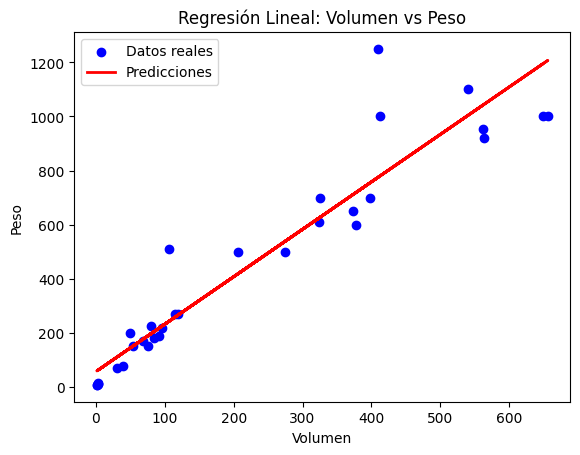

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir las variables independiente (X) y dependiente (y)
X = df_fish[['Volumen']]
y = df_fish['Weight']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Graficar los resultados del modelo
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Regresión Lineal: Volumen vs Peso')
plt.xlabel('Volumen')
plt.ylabel('Peso')
plt.legend()
plt.show()


### 4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces? Explica.


In [16]:
# Obtener las especies únicas
species = df_fish['Species'].unique()

for specie in species:
    df_species = df_fish[df_fish['Species'] == specie]
    X_species = df_species[['Volumen']]
    y_species = df_species['Weight']
    
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_species, y_species, test_size=0.2, random_state=42)
    
    model_species = LinearRegression()
    model_species.fit(X_train_s, y_train_s)
    y_pred_s = model_species.predict(X_test_s)
    
    mse_s = mean_squared_error(y_test_s, y_pred_s)
    r2_s = r2_score(y_test_s, y_pred_s)
    
    print(f'{specie} - Mean Squared Error: {mse_s}')
    print(f'{specie} - R-squared: {r2_s}')


Bream - Mean Squared Error: 5269.549726142476
Bream - R-squared: 0.8373032125131651
Roach - Mean Squared Error: 221.52669340937206
Roach - R-squared: 0.9782607833850582
Whitefish - Mean Squared Error: 5541.423289489796
Whitefish - R-squared: 0.0
Parkki - Mean Squared Error: 57.283683021840396
Parkki - R-squared: 0.9928828357050642
Perch - Mean Squared Error: 4747.5748953155135
Perch - R-squared: 0.9592421047814468
Pike - Mean Squared Error: 62308.96407975727
Pike - R-squared: 0.7952919769662445
Smelt - Mean Squared Error: 2.978220305737381
Smelt - R-squared: 0.5569589627828688


Un alto R² para todas las especies:

Indicaría que el volumen es un buen predictor del peso para todas las especies de peces.
Variable R² entre especies:

Si algunas especies tienen un R² alto y otras bajo, podría indicar que el volumen es un mejor predictor del peso para algunas especies que para otras. Esto podría deberse a diferencias en la forma o densidad de los peces.
Consistentemente bajo R²:

Si el R² es bajo para todas las especies, sugiere que el volumen por sí solo no es un buen predictor del peso y que podrían necesitarse más variables o un modelo más complejo.
Este enfoque permite ver cómo varía la relación entre el volumen y el peso entre diferentes especies, lo que podría proporcionar información valiosa para un análisis más detallado.

### 5. Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. Realiza una breve evaluación del modelo.

In [17]:
# Definir las variables independientes (X) y dependiente (y)
X_multi = df_fish[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y_multi = df_fish['Weight']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model_multi = LinearRegression()

# Entrenar el modelo
model_multi.fit(X_train_m, y_train_m)

# Predecir en el conjunto de prueba
y_pred_m = model_multi.predict(X_test_m)

# Evaluar el modelo
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

print(f'Mean Squared Error: {mse_m}')
print(f'R-squared: {r2_m}')


Mean Squared Error: 16763.887193140738
R-squared: 0.8821430593048696


Evaluación del Modelo
El MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia promedio al cuadrado entre los valores observados y los valores predichos. Un valor más bajo de MSE indica un mejor ajuste del modelo.

El R² es la proporción de la variación total de la variable dependiente (peso) que se puede explicar utilizando las variables independientes (Length1, Length2, Length3, Height, Width). Un valor de R² cercano a 1 indica que el modelo explica bien la variación de los datos.
Interpretación de Resultados
MSE bajo y R² alto: Si el MSE es bajo y el R² es alto (cercano a 1), significa que el modelo ajusta bien los datos y que las variables independientes seleccionadas son buenos predictores del peso de los peces.

MSE alto y R² bajo: Si el MSE es alto y el R² es bajo, significa que el modelo no ajusta bien los datos y que podría ser necesario considerar otras variables, transformar las variables existentes, o utilizar un modelo más complejo.